# If-satser och villkor

*Av Anders Sundell*

Nästan alla kommandon i Stata går att kombinera med så kallade if-satser. Det är villkor som anger på vilka observationer kommandot ska köras. Det kan handla om att man vill koda om vissa specifika observationer, eller göra en analys bara på en del av datamängden, och så vidare.

Villkoren utgår från en uppsättning "logiska operatorer," byggstenar med vilka vi kan konstruera både enkla och komplicerade villkor. De känns också igen från många andra datorprogram. De viktigaste operatorerna är:

| Operator | Betydelse |
|----------|-----------|
| ==       | Lika med  |
| !=       | Inte lika med |
| >        | Större än |
| <        | Mindre än |
| >=       | Större eller lika med |
| <=       | Mindre än eller lika med |
| &        | Och       |
| $|$       | Eller    |

De två sista, och och eller, kan användas för att länka ihop flera villkor. Om man till exempel jobbar med individdata kan man göra ett villkor som kräver att individen är över 25 år OCH är arbetslös, till exempel. Eller att vi vill välja ut de personer som är under 22 år ELLER aldrig har röstat i ett riksdagsval.

**If-satserna går in efter att man har listat variablerna, och innan man anger options (,).**

Med hjälp av QoG basic-datamängden ska vi se hur dessa villkor kan användas i alla möjliga sammanhang.

In [1]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


## I beskrivande statistik
If-satser är bra för att välja ut särskila grupper av analysenheter. Säg att vi vill undersöka graden av korruption i världen. För att räkna ut medelvärdet kan vi skriva:

In [4]:
sum ti_cpi


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ti_cpi |        181    42.82476     19.5057          8         92


Men säg nu att vi vill göra detta för en mindre grupp länder. Till exempel de som räknas som fria enligt Freedom House, dvs har värdet 1 på variabeln `fh_status`. Vi lägger då till en if-sats i kommandot:

In [5]:
sum ti_cpi if fh_status==1


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ti_cpi |         77    57.25041    17.40723         30         92


Antalet observationer är nu mycket lägre, 77 istället för 181. Och medelvärdet är högre: 57.3 istället för 42.8. Korruptionen är i allmänhet inte lika allvarlig i demokratiska länder. Vi kan också använda if-satser för att undersöka observationer som kommer över något tröskelvärde, tex länder med befolkning `unna_pop` som överstiger 50 miljoner:

In [7]:
sum ti_cpi if unna_pop > 50000000


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ti_cpi |         28    42.71429    17.87168         21         79


If-satserna fungerar som sagt på i princip alla kommandon. Till exempel också kommandot `list`. Säg att vi vill ha ut en lista över alla länder i Östeuropa och forna Sovjetunionen, och om de räknas som demokratier eller diktaturer. Vi utgår då från variabeln `ht_region`, där Östeuropa har koden 1. Vi tar ut en lista över två varibler, landets namn `cname` och dess demokratistatus `fh_status`. Vi lägger också till option `clean` som tar bort linjerna i tabellen. Options kommer efter if-satsen.

In [12]:
list cname fh_status if ht_region==1, clean


                        cname     fh_status  
  2.                  Albania   Partly Free  
  7.               Azerbaijan      Not Free  
 14.                  Armenia   Partly Free  
 19.   Bosnia and Herzegovina   Partly Free  
 25.                 Bulgaria          Free  
 28.                  Belarus      Not Free  
 44.                  Croatia          Free  
 47.           Czech Republic          Free  
 57.                  Estonia          Free  
 63.                  Georgia   Partly Free  
 75.                  Hungary          Free  
 87.               Kazakhstan      Not Free  
 93.               Kyrgyzstan   Partly Free  
 97.                   Latvia          Free  
101.                Lithuania          Free  
114.                  Moldova   Partly Free  
115.               Montenegro          Free  
138.                   Poland          Free  
143.                  Romania          Free  
144.                   Russia      Not Free  
153.                   Serbia    

Om vi vill komprimera ovanstående lista kan vi istället ta ut den som en frekvenstabell med `tab`, där vi istället får se hur många länder som faller inom varje kategori.

In [10]:
tab fh_status if ht_region==1


    Freedom |
     Status |      Freq.     Percent        Cum.
------------+-----------------------------------
       Free |         13       46.43       46.43
Partly Free |          8       28.57       75.00
   Not Free |          7       25.00      100.00
------------+-----------------------------------
      Total |         28      100.00


## I grafer
If-satser är väldigt användbara när man gör grafer, särskilt med kommandot `twoway`, eftersom man med det lätt kan lägga olika lager av grafer ovanpå varandra. Varje lager kan ha egna villkor för vilka enheter som ska ingå, men man kan också göra if-satser som tillämpas på grafen som helhet. I grafen nedan ritar vi upp sambandet mellan korruption `ti_cpi`och etnisk fragmentering `al_ethnic`. Vi lägger till en if-sats för hela grafen, som begränsar urvalet till antingen Västeuropa och Nordamerika `ht_region==5` ELLER Afrika söder om Sahara `ht_region==4`.

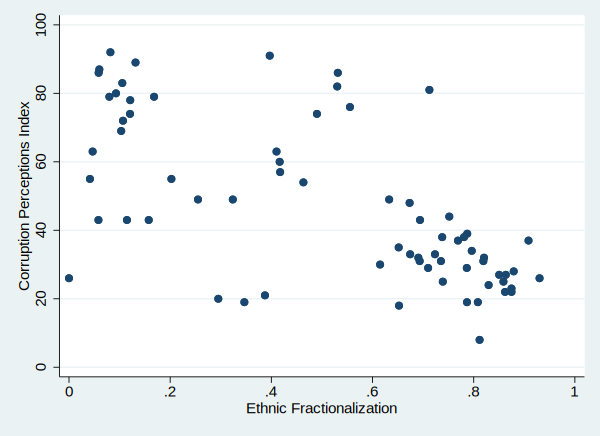

In [4]:
twoway (scatter ti_cpi al_ethnic) if ht_region==5 | ht_region==4

Men vi kan som sagt också använda if-satser inom respektive lager. Vi göra ett lager där bara Västeuropa och Nordamerika ingår, och ett lager där bara Afrika söder om Sahara ingår. Fördelen är att vi då kan modifiera utseendet för varje lager. Vi gör punkterna i Västeuropa och Nordamerika blåa, och Afrika söder om Sahara röda. Notera att if-satserna här står inom parenteserna, och då bara påverkar det andra som står inom just den parentesen. Men också här kommer de före options.

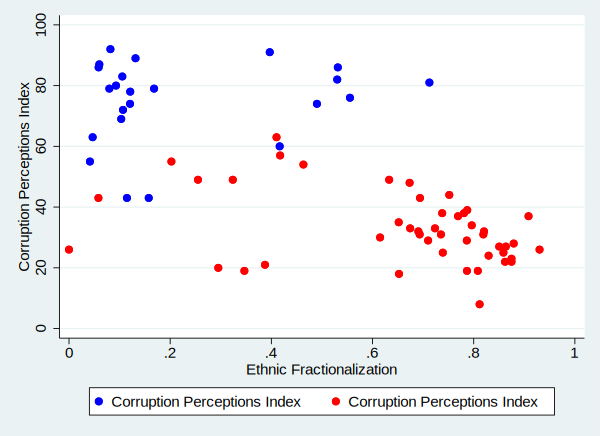

In [5]:
twoway  (scatter ti_cpi al_ethnic if ht_region==5, mcolor(blue)) ///
        (scatter ti_cpi al_ethnic if ht_region==4, mcolor(red))

Väldigt användbart i den här typen av scatterplots är också att använda ett nytt lager med bara ett fåtal utvalda analysenheter, som markeras särskilt i diagrammet. Vi kanske till exempel vill visa var Sverige och USA. Då gör vi ett nytt lager, med ett villkor att landsnamnet ska vara Sverige ELLER USA, och i det lagret skriver vi också att landsnamnet ska skrivas ut. Vi lägger dessutom till ett option `legend(off)` som tar bort förklaringen längst ner - man får annars en förklaring per lager, vilket blir fult.

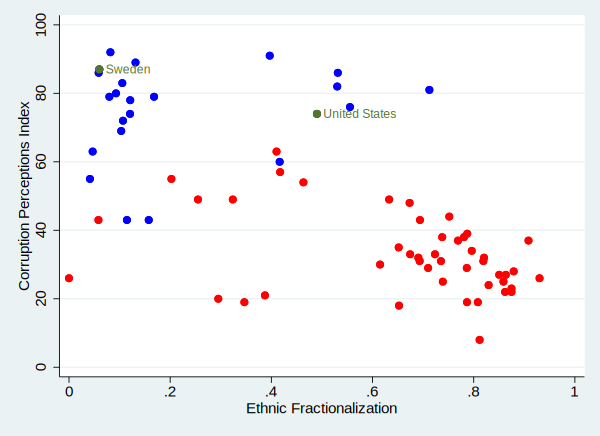

In [13]:
twoway  (scatter ti_cpi al_ethnic if ht_region==5, mcolor(blue)) ///
        (scatter ti_cpi al_ethnic if ht_region==4, mcolor(red)) ///
        (scatter ti_cpi al_ethnic if cname=="Sweden" | cname=="United States", mlabel(cname)) ///
        , legend(off)

# I regressionsanalyser

If-satser kan användas i regressionsanalyser (eller andra typer av sambandsanalyser) för att göra om analyser i olika subgrupper, eller för att utesluta vissa outliers. Först kan vi prova att göra en regressionsanalys av sambandet mellan korruption och etnisk fragmentering bara i Afrika söder om Sahara. Notera att det bara är 46 enheter med i analysen.

In [9]:
reg ti_cpi al_ethnic if ht_region==4


      Source |       SS           df       MS      Number of obs   =        46
-------------+----------------------------------   F(1, 44)        =      7.85
       Model |  967.759581         1  967.759581   Prob > F        =    0.0075
    Residual |  5421.89259        44  123.224832   R-squared       =    0.1515
-------------+----------------------------------   Adj R-squared   =    0.1322
       Total |  6389.65217        45  141.992271   Root MSE        =    11.101

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   al_ethnic |  -19.91737    7.10718    -2.80   0.008    -34.24095   -5.593787
       _cons |   46.17676   4.949334     9.33   0.000     36.20203    56.15149
------------------------------------------------------------------------------


Man kan också utesluta enskilda outliers. Singapore är till exempel ett speciellt land när det gäller korruption. Vi kan prova att utesluta det landet för att säkerställa att inte resultatet påverkas otillbörligt av det. Då använder vi inte lika med, !=, för att ta bort just Singapore.

In [11]:
reg ti_cpi al_ethnic if cname!="Singapore"


      Source |       SS           df       MS      Number of obs   =       172
-------------+----------------------------------   F(1, 170)       =     29.32
       Model |  9434.28622         1  9434.28622   Prob > F        =    0.0000
    Residual |   54703.246       170    321.7838   R-squared       =    0.1471
-------------+----------------------------------   Adj R-squared   =    0.1421
       Total |  64137.5323       171  375.073288   Root MSE        =    17.938

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   al_ethnic |  -28.63565   5.288525    -5.41   0.000    -39.07528   -18.19601
       _cons |   55.72485   2.684605    20.76   0.000      50.4254    61.02431
------------------------------------------------------------------------------


## Avslutning

Villkor går att använda på mängder av olika sätt. En sak som är viktig att tänka på är dock att när man sätter ihop flera olika delvillkor så ska varje del av villkoret kunna stå på egna ben så att säga. Om vi till exempel vill göra ett villkor som väljer ut Sverige eller USA kan vi INTE skriva:

`if cname == ("Sweden" | "United States"`)

utan det måste stå:

`if cname == "Sweden" | cname == "United States"`

Dvs variabelnamnet måste finnas med i varje delvillkor. Sedan är det viktigt att tänka på skillnaden mellan OCH `&` och ELLER `|`. Man hade kunnat tänka sig att man i exemplet ovan skriva `if cname == "Sweden" & cname == "United States"` för att man tänker sig att båda går bra. Men då skulle Stata letat efter fall där landsnamnet var både "Sweden" och "United States", och det kan det inte vara, alltså skulle inga fall valts ut.